# Regression Modeling

In [1]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import lars_path

from xgboost import XGBClassifier

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline

In [2]:
vinylsfinal = pd.read_pickle("./vinylsfinal.pkl")

In [3]:
vinylsfinal.dropna(inplace=True)
vinylsfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14108 entries, 3 to 25756
Data columns (total 26 columns):
Price                    14108 non-null float64
Artist                   14108 non-null object
Album                    14108 non-null object
Release_Date             14108 non-null int64
Media_Condition          14108 non-null int64
Sleeve_Condition         14108 non-null int64
Haves                    14108 non-null int64
Wants                    14108 non-null int64
Percent_Seller_Rating    14108 non-null float64
Rate                     14108 non-null float64
Votes                    14108 non-null int64
Blues                    14108 non-null int64
Brass & Military         14108 non-null int64
Classical                14108 non-null int64
Electronic               14108 non-null int64
Hip Hop                  14108 non-null int64
Jazz                     14108 non-null int64
Latin                    14108 non-null int64
Pop                      14108 non-null int64
Reggae   

## Ordinary Least Squares with all features

In [4]:
X = vinylsfinal.drop(['Price', 'Artist', 'Album'], axis=1)
y = vinylsfinal.Price

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=11)


OLS = sm.OLS(y_train, X_train)

OLS_model = OLS.fit()

OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     235.4
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:11:17   Log-Likelihood:                -38520.
No. Observations:                8464   AIC:                         7.709e+04
Df Residuals:                    8441   BIC:                         7.725e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Release_Date             -0.0429      0.016     -2.697      0.007      -0.074      -0.012
Media_Condition           2.2868      0.283      8.093      0.000       1.733       2.841
Sleeve_Condition          1.0612      0.082     12.944      0.000       0.901       1.222
Haves                     0.0017      0.002      0.955      0.340      -0.002       0.005
Wants                     0.0620      0.004     16.416      0.000       0.055       0.069
Percent_Seller_Rating    54.2669     30.811      1.761      0.078      -6.131     114.665
Rate                      5.5194      0.489     11.290      0.000       4.561       6.478
Votes                    -0.1591      0.025     -6.440      0.000      -0.207      -0.111
Blues                     9.0698      2.769      3.276      0.001       3.642      14.497
Brass & Military        -26.1879     23.501     -1.114      0.265     -72.255      19.879
Classical                 6.0306      4.170      1.446      0.148      -2.143      14.204
Electronic               -3.4066      0.787     -4.327      0.000      -4.950      -1.863
Hip Hop                  -4.0513      1.066     -3.799      0.000      -6.142      -1.961
Jazz                      0.2723      1.338      0.204      0.839      -2.350       2.895
Latin                    10.3681      1.088      9.528      0.000       8.235      12.501
Pop                      -1.0478      0.789     -1.329      0.184      -2.594       0.498
Reggae                    6.4581      3.376      1.913      0.056      -0.160      13.076
Rock                     13.3586      0.817     16.348      0.000      11.757      14.960
Stage & Screen            6.4107      1.946      3.295      0.001       2.597      10.224
Childrens                 1.3067      4.559      0.287      0.774      -7.630      10.244
Funk/Soul                 0.9105      0.782      1.165      0.244      -0.622       2.443
Folk/Country/World       -5.7915      1.422     -4.072      0.000      -8.579      -3.004
Score                     0.0369      0.011      3.346      0.001       0.015       0.058
==============================================================================
Omnibus:                    15919.302   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         72607961.968
Skew:                          13.870   Prob(JB):                         0.00
Kurtosis:                     455.894   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
y_pred = OLS_model.predict(X_val)

R2 = metrics.r2_score(y_val, y_pred)

MSE = metrics.mean_squared_error(y_val, y_pred)
RMSE = np.sqrt(MSE)

R2

0.08152680751128072

## OLS with high p-value features removed

In [6]:
X = vinylsfinal.drop(['Price', 'Artist', 'Album', 'Haves', 'Brass & Military', 'Classical', 'Jazz',
                      'Pop', 'Childrens', 'Funk/Soul'], axis=1)
y = vinylsfinal.Price

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=11)


OLS2 = sm.OLS(y_train, X_train)

OLS_model2 = OLS2.fit()

OLS_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     338.0
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:11:17   Log-Likelihood:                -38524.
No. Observations:                8464   AIC:                         7.708e+04
Df Residuals:                    8448   BIC:                         7.719e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Release_Date             -0.0422      0.016     -2.700      0.007      -0.073      -0.012
Media_Condition           2.3014      0.281      8.189      0.000       1.751       2.852
Sleeve_Condition          1.0719      0.081     13.167      0.000       0.912       1.232
Wants                     0.0606      0.003     18.445      0.000       0.054       0.067
Percent_Seller_Rating    52.9285     30.300      1.747      0.081      -6.466     112.323
Rate                      5.5525      0.486     11.416      0.000       4.599       6.506
Votes                    -0.1372      0.008    -17.010      0.000      -0.153      -0.121
Blues                     8.9316      2.740      3.259      0.001       3.560      14.303
Electronic               -3.7840      0.690     -5.481      0.000      -5.137      -2.431
Hip Hop                  -4.2378      1.027     -4.125      0.000      -6.251      -2.224
Latin                     9.8903      1.060      9.333      0.000       7.813      11.968
Reggae                    6.2589      3.369      1.858      0.063      -0.345      12.863
Rock                     13.0577      0.751     17.385      0.000      11.585      14.530
Stage & Screen            6.5001      1.934      3.362      0.001       2.710      10.291
Folk/Country/World       -5.9819      1.399     -4.274      0.000      -8.725      -3.239
Score                     0.0363      0.011      3.345      0.001       0.015       0.058
==============================================================================
Omnibus:                    15933.064   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         72860686.318
Skew:                          13.897   Prob(JB):                         0.00
Kurtosis:                     456.681   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
y_pred = OLS_model2.predict(X_val)

R2 = metrics.r2_score(y_val, y_pred)

MSE = metrics.mean_squared_error(y_val, y_pred)
RMSE = np.sqrt(MSE)

R2

0.08171669445698115

## Regression with GridSearchCV

In [8]:
X = vinylsfinal.drop(['Price', 'Artist', 'Album'], axis=1)
y = vinylsfinal.Price

X, y = np.array(X), np.array(y)

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=11)


kf = KFold(n_splits=5, shuffle=True, random_state = 11)

In [9]:
params = {'fit_intercept':[True,False]}
lr_model = GridSearchCV(LinearRegression(),params, cv=5)
lr_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
lr_model.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lr_model.best_estimator_.score(X_val, y_val)

0.08643931039204977

## Ridge Regression with GridSearchCV

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [13]:
alphas = np.arange(0.001,1.0,0.001) 

hyper_param_grid = {'alpha': alphas, 'fit_intercept': [True, False]}

ridge_model = GridSearchCV(Ridge(), hyper_param_grid, cv=5, n_jobs=-1)

ridge_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([0.001, 0.002, ..., 0.998, 0.999]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
ridge_model.best_estimator_

Ridge(alpha=0.999, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
ridge_model.best_estimator_.score(X_val, y_val)

0.08654806644024504

## Lasso Regression with GridSearchCV

In [16]:
alphas = np.arange(0.1,1.0,0.1) 

hyper_param_grid = {'alpha': alphas, 'fit_intercept': [True, False]}

lasso_model = GridSearchCV(Lasso(), hyper_param_grid, cv=5, n_jobs=-1)

lasso_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
lasso_model.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
lasso_model.best_estimator_.score(X_val, y_val)

0.08343706827985031

## Transformations

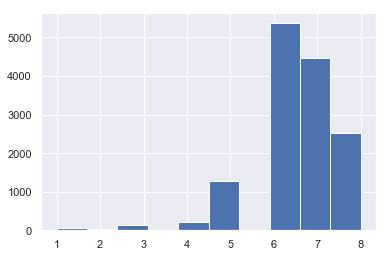

In [19]:
sns.set()
plt.hist(vinylsfinal.Media_Condition);

Lambda: 2.026735095311616


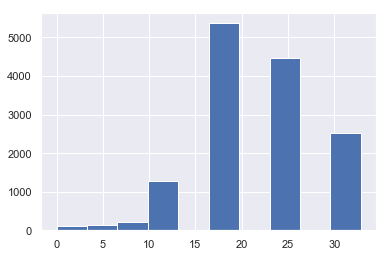

In [20]:
lamb = stats.boxcox_normmax(vinylsfinal.Media_Condition)
print("Lambda:", lamb)
Media_t = (np.power(vinylsfinal.Media_Condition,lamb)-1)/lamb

plt.hist(Media_t);

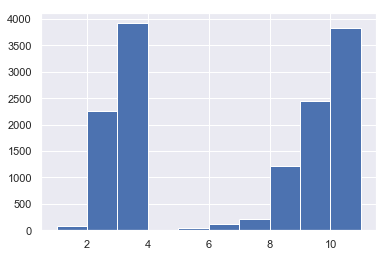

In [21]:
plt.hist(vinylsfinal.Sleeve_Condition);

Lambda: 2.947910882477419


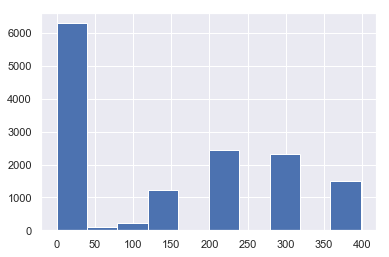

In [22]:
lamb2 = stats.boxcox_normmax(vinylsfinal.Sleeve_Condition)
print("Lambda:", lamb2)
Sleeve_t = (np.power(vinylsfinal.Sleeve_Condition,lamb2)-1)/lamb2

plt.hist(Sleeve_t);

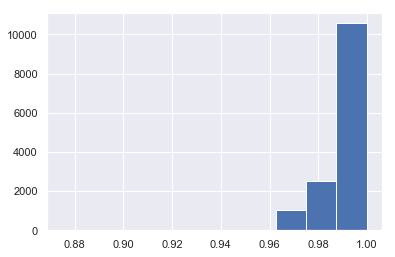

In [23]:
plt.hist(vinylsfinal.Percent_Seller_Rating);

Lambda: 142.15733528297062


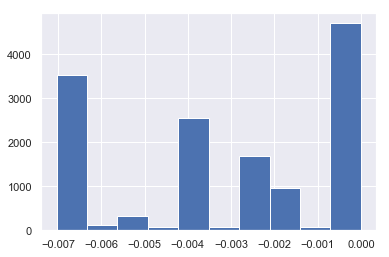

In [24]:
lamb3 = stats.boxcox_normmax(vinylsfinal.Percent_Seller_Rating)
print("Lambda:", lamb3)
Seller_t = (np.power(vinylsfinal.Percent_Seller_Rating,lamb3)-1)/lamb3

plt.hist(Seller_t);

In [25]:
vinyl_t = vinylsfinal
vinyl_t['Seller_t'] = Seller_t
vinyl_t['Media_t'] = Media_t
vinyl_t['Sleeve_t'] = Sleeve_t

del vinyl_t['Sleeve_Condition']
del vinyl_t['Media_Condition']
del vinyl_t['Percent_Seller_Rating']

vinyl_t.head()

,Price,Artist,Album,Release_Date,Haves,Wants,Rate,Votes,Blues,Brass & Military,...,Reggae,Rock,Stage & Screen,Childrens,Funk/Soul,Folk/Country/World,Score,Seller_t,Media_t,Sleeve_t
3,5.00,New Edition,Once In A Lifetime Groove,1986,55,48,3.985851,0,0,0,...,0,0,0,0,1,0,59.0,0.0,18.14074,155.513520
6,1.88,The Quadrajets*,The Real Fucked Up Blues,1997,65,15,3.985851,0,0,0,...,0,1,0,0,0,0,3.0,0.0,18.14074,220.211013
9,2.88,Uncle Joe's Big Ol' Driver,Don't Go,1994,16,4,3.985851,0,0,0,...,0,1,0,0,0,0,2.0,0.0,18.14074,155.513520
14,0.88,Whatever...,Socially Retarded,1996,62,9,3.985851,0,0,0,...,0,1,0,0,0,0,43.0,0.0,18.14074,220.211013
16,4.00,JC Lodge,Selfish Lover,1990,13,18,3.985851,0,0,0,...,1,0,0,0,0,0,0.0,0.0,18.14074,8.310388


## OLS with Box-Cox Transformed Features

In [26]:
Xt = vinyl_t.drop(['Price', 'Artist', 'Album'], axis=1)
yt = vinyl_t.Price

Xt, Xt_test, yt, yt_test = train_test_split(Xt, yt, test_size=.2, random_state=11)

Xt_train, Xt_val, yt_train, yt_val = train_test_split(Xt, yt, test_size=.25, random_state=11)


OLSt = sm.OLS(yt_train, Xt_train)

OLSt_model = OLSt.fit()

OLSt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     236.9
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:11:36   Log-Likelihood:                -38510.
No. Observations:                8464   AIC:                         7.707e+04
Df Residuals:                    8441   BIC:                         7.723e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Release_Date          -0.0089      0.001     -7.732      0.000      -0.011      -0.007
Haves                  0.0025      0.002      1.469      0.142      -0.001       0.006
Wants                  0.0631      0.004     16.718      0.000       0.056       0.070
Rate                   5.1707      0.489     10.566      0.000       4.211       6.130
Votes                 -0.1680      0.025     -6.828      0.000      -0.216      -0.120
Blues                  9.5107      2.765      3.440      0.001       4.090      14.931
Brass & Military     -26.9521     23.473     -1.148      0.251     -72.964      19.060
Classical              7.4033      4.163      1.778      0.075      -0.757      15.563
Electronic            -3.5628      0.762     -4.674      0.000      -5.057      -2.069
Hip Hop               -5.1228      1.044     -4.909      0.000      -7.168      -3.077
Jazz                   1.2082      1.329      0.909      0.363      -1.398       3.814
Latin                  9.0817      1.095      8.295      0.000       6.935      11.228
Pop                   -1.6707      0.792     -2.111      0.035      -3.222      -0.119
Reggae                 6.1584      3.370      1.827      0.068      -0.448      12.765
Rock                  13.2108      0.815     16.202      0.000      11.612      14.809
Stage & Screen         6.7326      1.939      3.472      0.001       2.932      10.533
Childrens             -1.1667      4.550     -0.256      0.798     -10.086       7.753
Funk/Soul             -0.2833      0.790     -0.359      0.720      -1.832       1.266
Folk/Country/World    -5.6199      1.419     -3.960      0.000      -8.402      -2.838
Score                  0.0298      0.011      2.697      0.007       0.008       0.051
Seller_t            -842.4442    109.228     -7.713      0.000   -1056.558    -628.330
Media_t                0.2014      0.046      4.425      0.000       0.112       0.291
Sleeve_t               0.0197      0.002      9.167      0.000       0.015       0.024
==============================================================================
Omnibus:                    15929.108   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         72407469.130
Skew:                          13.892   Prob(JB):                         0.00
Kurtosis:                     455.264   Cond. No.                     8.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
yt_pred = OLS_model.predict(Xt_val)

R2 = metrics.r2_score(yt_val, yt_pred)

MSE = metrics.mean_squared_error(yt_val, yt_pred)
RMSE = np.sqrt(MSE)

R2

-660.7526684723574

## OLS with Feature Engineering

In [28]:
vins = vinyl_t.drop(['Artist', 'Album', 'Haves', 'Brass & Military', 'Classical', 'Jazz',
                      'Pop', 'Childrens', 'Funk/Soul'], axis=1)
vins.head()

,Price,Release_Date,Wants,Rate,Votes,Blues,Electronic,Hip Hop,Latin,Reggae,Rock,Stage & Screen,Folk/Country/World,Score,Seller_t,Media_t,Sleeve_t
3,5.00,1986,48,3.985851,0,0,1,0,0,0,0,0,0,59.0,0.0,18.14074,155.513520
6,1.88,1997,15,3.985851,0,0,0,0,0,0,1,0,0,3.0,0.0,18.14074,220.211013
9,2.88,1994,4,3.985851,0,0,0,0,0,0,1,0,0,2.0,0.0,18.14074,155.513520
14,0.88,1996,9,3.985851,0,0,0,0,0,0,1,0,0,43.0,0.0,18.14074,220.211013
16,4.00,1990,18,3.985851,0,0,0,0,0,1,0,0,0,0.0,0.0,18.14074,8.310388


In [29]:
vin = vins.rename(columns = {'Price':'Y', 'Release_Date':'X1', 'Wants': 'X2', 'Rate': 'X3', 'Votes': 'X4', 'Blues': 'X5', 'Electronic': 'X6', 'Hip Hop': 'X7', 'Latin': 'X8', 'Reggae': 'X9', 'Rock': 'X10', 'Stage & Screen': 'X11', 'Folk/Country/World': 'X12', 'Score': 'X13', 'Seller_t': 'X14', 'Media_t': 'X15', 'Sleeve_t': 'X16'})
vin.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
3,5.00,1986,48,3.985851,0,0,1,0,0,0,0,0,0,59.0,0.0,18.14074,155.513520
6,1.88,1997,15,3.985851,0,0,0,0,0,0,1,0,0,3.0,0.0,18.14074,220.211013
9,2.88,1994,4,3.985851,0,0,0,0,0,0,1,0,0,2.0,0.0,18.14074,155.513520
14,0.88,1996,9,3.985851,0,0,0,0,0,0,1,0,0,43.0,0.0,18.14074,220.211013
16,4.00,1990,18,3.985851,0,0,0,0,0,1,0,0,0,0.0,0.0,18.14074,8.310388


In [30]:
y, X = patsy.dmatrices('Y ~ X1:X2 + X1:X4 + X1:X6 + X1:X7 + X1:X10 + X1:X11 + X1:X13 + X1:X14 + X1:X15 + X1:X16 + X2 + X2:X8 + X2:X9 + X2:X15 + X3 + X3:X4 + X3:X6 + X3:X10 + X4 + X4:X9 + X4:X15 + X5 + X6 + X7 + X8:X13 + X8:X15 + X9:X10 + X9:X16 + X10 + X10:X14 + X10:X16 + X11 + X12 + X13 + X14 + X14:X15 + X14:X16 + X16', data=vin, return_type="dataframe")

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=11)

model = sm.OLS(y, X)

fitmodel = model.fit()

fitmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     75.35
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:11:36   Log-Likelihood:                -53878.
No. Observations:               11286   AIC:                         1.078e+05
Df Residuals:                   11247   BIC:                         1.081e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.8671      4.272     -6.289      0.000     -35.241     -18.494
X1:X2         -0.0026      0.000     -8.560      0.000      -0.003      -0.002
X1:X4          0.0065      0.001      6.630      0.000       0.005       0.008
X1:X6          0.2080      0.067      3.124      0.002       0.077       0.338
X1:X7          0.4822      0.137      3.517      0.000       0.213       0.751
X1:X10        -0.3507      0.075     -4.693      0.000      -0.497      -0.204
X1:X11         0.6486      0.177      3.660      0.000       0.301       0.996
X1:X13         0.0039      0.001      4.297      0.000       0.002       0.006
X1:X14        79.2869     12.860      6.165      0.000      54.079     104.495
X1:X15         0.0002   4.33e-05      3.849      0.000    8.17e-05       0.000
X1:X16        -0.0016      0.000     -7.860      0.000      -0.002      -0.001
X2             5.2970      0.611      8.673      0.000       4.100       6.494
X2:X8          0.1530      0.043      3.526      0.000       0.068       0.238
X2:X9          0.9492      0.099      9.609      0.000       0.756       1.143
X2:X15         0.0026      0.001      4.021      0.000       0.001       0.004
X3             5.3816      0.941      5.717      0.000       3.537       7.227
X3:X4         -0.1462      0.027     -5.354      0.000      -0.200      -0.093
X3:X6         -2.7546      1.162     -2.370      0.018      -5.033      -0.476
X3:X10        10.0569      1.399      7.186      0.000       7.314      12.800
X4           -12.3703      1.896     -6.523      0.000     -16.088      -8.653
X4:X9         -3.8789      0.426     -9.114      0.000      -4.713      -3.045
X4:X15        -0.0041      0.002     -2.438      0.015      -0.007      -0.001
X5             7.3497      3.084      2.383      0.017       1.305      13.394
X6          -404.0865    132.426     -3.051      0.002    -663.664    -144.509
X7          -961.7764    273.360     -3.518      0.000   -1497.610    -425.943
X8:X13        -0.1883      0.040     -4.694      0.000      -0.267      -0.110
X8:X15         0.6852      0.105      6.545      0.000       0.480       0.890
X9:X10        88.4108      9.359      9.447      0.000      70.066     106.756
X9:X16         0.0442      0.020      2.197      0.028       0.005       0.084
X10          656.5794    147.544      4.450      0.000     367.368     945.791
X10:X14    -1575.7634    378.699     -4.161      0.000   -2318.080    -833.447
X10:X16        0.0383      0.006      6.068      0.000       0.026       0.051
X11        -1280.5386    350.278     -3.656      0.000   -1967.145    -593.932
X12           -4.6062      1.534     -3.002      0.003      -7.614      -1.598
X13           -7.6512      1.787     -4.283      0.000     -11.153      -4.149
X14        -1.608e+05   2.55e+04     -6.317      0.000   -2.11e+05   -1.11e+05
X1

In [31]:
y_pred = fitmodel.predict(X_val)

R2 = metrics.r2_score(y_val, y_pred)

MSE = metrics.mean_squared_error(y_val, y_pred)
RMSE = np.sqrt(MSE)

R2

0.1624020482047881

## K-Fold Cross Validation for Regular, Ridge, and Lasso Regression

In [32]:
y, X = patsy.dmatrices('Y ~ X1:X2 + X1:X4 + X1:X6 + X1:X7 + X1:X10 + X1:X11 + X1:X13 + X1:X14 + X1:X15 + X1:X16 + X2 + X2:X8 + X2:X9 + X2:X15 + X3 + X3:X4 + X3:X6 + X3:X10 + X4 + X4:X9 + X4:X15 + X5 + X6 + X7 + X8:X13 + X8:X15 + X9:X10 + X9:X16 + X10 + X10:X14 + X10:X16 + X11 + X12 + X13 + X14 + X14:X15 + X14:X16 + X16', data=vin, return_type="dataframe")

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10)

X, y = np.array(X), np.array(y)

kf = KFold(n_splits=10, shuffle=True, random_state = 10)

In [33]:
errors_reg=[]
errors_ridge=[]
errors_lasso=[]

coeffs_reg = []

for train_index, val_index in kf.split(X,y):
    
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index] 
    
    lm = LinearRegression()
    lm_ridge = Ridge(alpha=0.999)
    lm_lasso = Lasso(alpha=0.1)

    lm.fit(X_train, y_train)
    errors_reg.append(lm.score(X_val, y_val))
    coeffs_reg.append(lm.coef_)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    errors_ridge.append(lm_ridge.score(X_val_scaled, y_val))
    
    lm_lasso.fit(X_train_scaled, y_train)
    errors_lasso.append(lm_lasso.score(X_val_scaled, y_val))    
    
print('Simple regression scores: ', errors_reg, '\n')
print('Ridge scores: ', errors_ridge, '\n')
print('Lasso scores: ', errors_lasso, '\n')

print('Mean Coeffs: ', np.mean(coeffs_reg, axis=0))


print(f'Simple mean cv r^2: {np.mean(errors_reg):.3f} +- {np.std(errors_reg):.3f}')
print(f'Ridge mean cv r^2: {np.mean(errors_ridge):.3f} +- {np.std(errors_ridge):.3f}')
print(f'Lasso mean cv r^2: {np.mean(errors_lasso):.3f} +- {np.std(errors_lasso):.3f}')

Simple regression scores:  [0.23712093305013518, 0.3266317138926268, 0.3150359245566706, 0.10064732730407033, 0.06126108492732341, 0.23905374910450627, 0.3476563345546291, -0.0066878969820880485, 0.38121088652974844, 0.24159504036137636] 

Ridge scores:  [0.21525483304414558, 0.2970267311088727, 0.2716888057161597, 0.09773949018095295, 0.0619956055261086, 0.21680264841440078, 0.31001270308083106, -0.03279044045266932, 0.3554626679901849, 0.24383495997063476] 

Lasso scores:  [0.2002251544396405, 0.2651840049927129, 0.2228239408427919, 0.0990595193358017, 0.05557348854872846, 0.19962364428192647, 0.28969973259749593, -0.010520978789945623, 0.32474944230306346, 0.2522084419766023] 

Mean Coeffs:  [[-2.25709461e-03 -2.30003744e-03  5.78185018e-03  2.23648361e-01
   4.69759710e-01 -4.18221173e-01  6.04987618e-01  2.21021172e-03
   7.87039231e+01  1.43482445e-04 -1.35876370e-03  4.59260016e+00
   4.09417318e-01  5.38749024e-01  2.90212123e-03  5.94589039e+00
  -1.37035678e-01 -3.45421978e+0

In [34]:
y_pred = lm.predict(X_test)

R2 = metrics.r2_score(y_test, y_pred)

MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('R2: ', R2)

MSE:  401.355755266395
RMSE:  20.03386521034808
R2:  0.24820274351019744


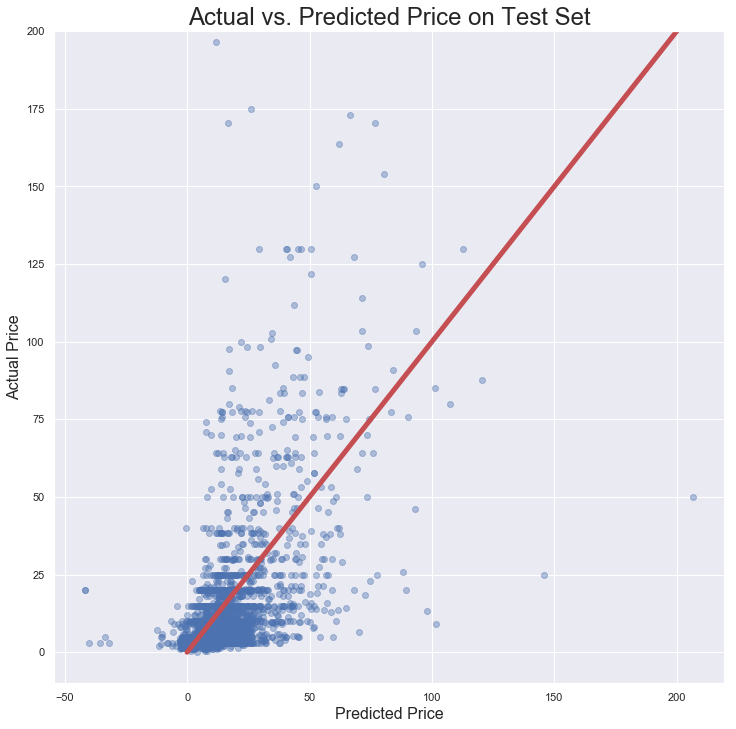

In [35]:
sns.set()
plt.figure(figsize=(12,12))
plt.scatter(y_pred, y_test, alpha=.4)
plt.plot(np.linspace(0,200,10), np.linspace(0,200,10), linewidth=5, color='r')
plt.ylim(-10,200)
plt.xlabel('Predicted Price', fontsize=16)
plt.ylabel('Actual Price', fontsize=16)
plt.title('Actual vs. Predicted Price on Test Set', fontsize=24)

plt.savefig('y_pred.png')

## Lars Path Feature Importance Plot

In [36]:
X = vinylsfinal.drop(['Price', 'Artist', 'Album'], axis=1)
y = vinylsfinal.Price

print("Computing regularization path using the LARS ...")
X, y = np.array(X), np.array(y)
alphas, _, coefs = lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

Xc = vinylsfinal.drop(['Price', 'Artist', 'Album'], axis=1)
Xc.columns

Computing regularization path using the LARS ...
.

Index(['Release_Date', 'Haves', 'Wants', 'Rate', 'Votes', 'Blues',
       'Brass & Military', 'Classical', 'Electronic', 'Hip Hop', 'Jazz',
       'Latin', 'Pop', 'Reggae', 'Rock', 'Stage & Screen', 'Childrens',
       'Funk/Soul', 'Folk/Country/World', 'Score', 'Seller_t', 'Media_t',
       'Sleeve_t'],
      dtype='object')

In [37]:
data = [ ]
for i in range(0, len(coefs)):
    trace = go.Scatter(x=xx, y=coefs[i],
                       mode='lines', showlegend=True, name = Xc.columns[i])
    data.append(trace)

for i in range(0, len(xx)):
    trace1 = go.Scatter(x=2* [xx[i]], y=[-800, 800],
                        mode='lines', showlegend=False,
                        line=dict(color='black', width=1,
                                  dash='dash')
                       )
    data.append(trace1)
    
layout = go.Layout(showlegend=True, title='LASSO Path',
                   xaxis=dict(title='|coef| / max|coef|', tickvals=[0]),
                   yaxis=dict(title='Coefficients', tickvals=[-10, -5, 0, 5,10]))
fig = go.Figure(data=data, layout=layout)

In [38]:
offline.plot(fig, filename='lassopath.html')

'file:///Users/kari/ds/metis/metisgh/luther/lassopath.html'

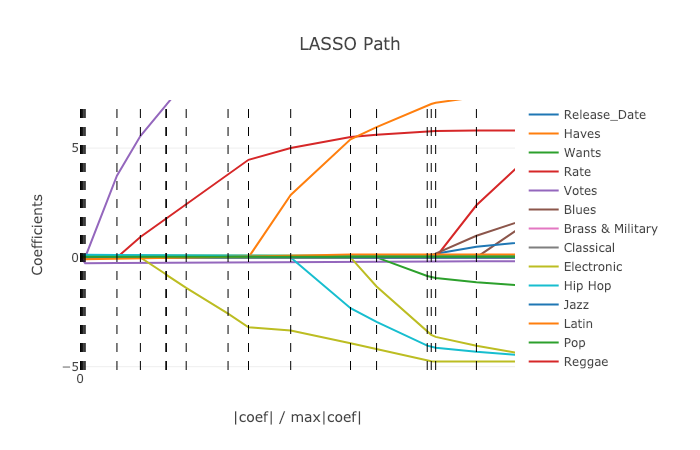